In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [39]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [40]:
# the data is in 3D (28*28 = 784 pixels).
X_train.shape

(60000, 28, 28)

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
import matplotlib.pyplot as plt


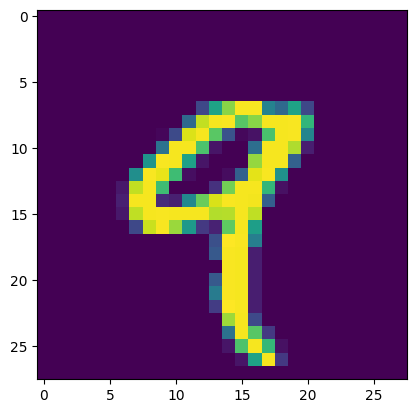

In [43]:
plt.imshow(X_train[4])

In [44]:
# did this kuyki saari values ko 0 se 1 ki range me laane ke leye kyuki isse weights and bias sahi nikl ke aati hai and convergence fast hota hai.
X_train = X_train/255
X_test = X_test/255

In [45]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
model = Sequential()

In [47]:
# Fllaten layer convert higher dimension layers into 1D layers.
# 1 se zyada output layers honge then we use softmax as a activation function.
model.add(Flatten(input_shape=(28,28)))
# INPUT LAYER.
model.add(Dense(128,activation='relu'))
#HIDDEN LAYER.
model.add(Dense(32,activation='relu'))
#OUTPUT LAYER.
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# 100480-> 784(inputs)*128(weights) + 128(bias).
# 4128 -> 128(inputs)*32(weights) + 32(bias).
# 330 -> 32(inputs)*10(weights) + 10(bias).
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [67]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9961 - loss: 0.0128 - val_accuracy: 0.9747 - val_loss: 0.1095
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9716 - val_loss: 0.1363
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9759 - val_loss: 0.1176
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9729 - val_loss: 0.1400
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9959 - loss: 0.0117 - val_accuracy: 0.9746 - val_loss: 0.1337
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0114 - val_accuracy: 0.9742 - val_loss: 0.1465
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 0.9754 - val_loss: 0.1386
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9963 - loss: 0.0113

In [54]:
# har image pr jayega and probiblity btayega ke 0 hone ki probablity kya hai 1 hone ki kya hai and so on.
Y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
# this piece of code return the max probability index for every image.first image is 7.
y_pred = Y_prob.argmax(axis=1)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy = accuracy_score(y_test,y_pred)

In [66]:
accuracy

0.9743

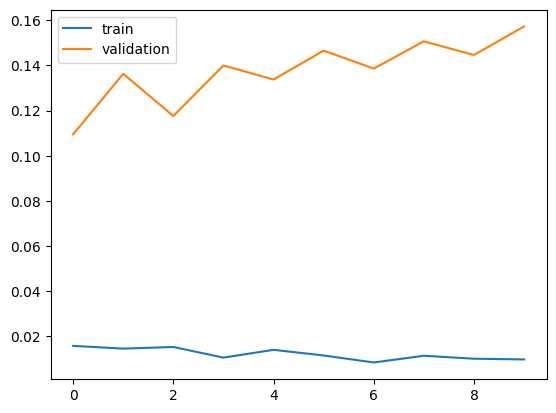

In [68]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

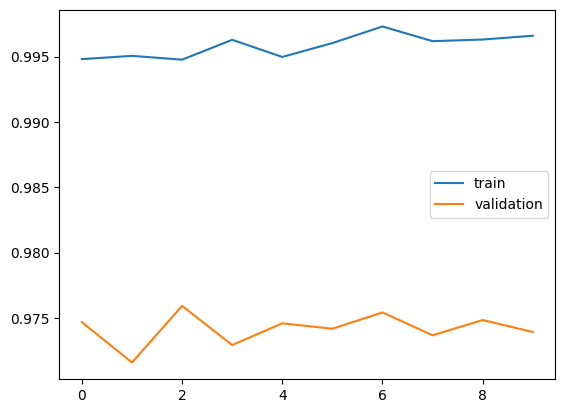

In [69]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

In [ ]:
# Steps to increase the accuracy
# 1-> increase number of nodes(perceptron).
# 2-> increase number of HIDDEN layer.
# 3-> change your activation function to RELU.
# 4-> increase number of epochs to 1000 or more.

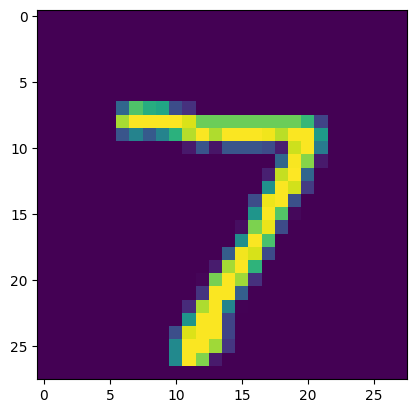

In [70]:
plt.imshow(X_test[0])

In [71]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([7])